# Importing of Key libraries

In [499]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

# Calling of the function to pull the data split into x_train_x_test,y_train,y_test

In [500]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)

# Function to get the split of data - x_train_x_test,y_train,y_test

In [501]:
from keras.src.api_export import keras_export
from keras.src.utils.file_utils import get_file


@keras_export("keras.datasets.boston_housing.load_data")
def load_data(path="boston_housing.npz", test_split=0.2, seed=113):
    """Loads the Boston Housing dataset.

    This is a dataset taken from the StatLib library which is maintained at
    Carnegie Mellon University.

    **WARNING:** This dataset has an ethical problem: the authors of this
    dataset included a variable, "B", that may appear to assume that racial
    self-segregation influences house prices. As such, we strongly discourage
    the use of this dataset, unless in the context of illustrating ethical
    issues in data science and machine learning.

    Samples contain 13 attributes of houses at different locations around the
    Boston suburbs in the late 1970s. Targets are the median values of
    the houses at a location (in k$).

    The attributes themselves are defined in the
    [StatLib website](http://lib.stat.cmu.edu/datasets/boston).

    Args:
        path: path where to cache the dataset locally
            (relative to `~/.keras/datasets`).
        test_split: fraction of the data to reserve as test set.
        seed: Random seed for shuffling the data
            before computing the test split.

    Returns:
        Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

    **x_train, x_test**: NumPy arrays with shape `(num_samples, 13)`
        containing either the training samples (for x_train),
        or test samples (for y_train).

    **y_train, y_test**: NumPy arrays of shape `(num_samples,)` containing the
        target scalars. The targets are float scalars typically between 10 and
        50 that represent the home prices in k$.
    """
    assert 0 <= test_split < 1
    origin_folder = (
        "https://storage.googleapis.com/tensorflow/tf-keras-datasets/"
    )
    path = get_file(
        path,
        origin=origin_folder + "boston_housing.npz",
        file_hash=(  # noqa: E501
            "f553886a1f8d56431e820c5b82552d9d95cfcb96d1e678153f8839538947dff5"
        ),
    )
    with np.load(path, allow_pickle=True) as f:
        x = f["x"]
        y = f["y"]

    rng = np.random.RandomState(seed)
    indices = np.arange(len(x))
    rng.shuffle(indices)
    x = x[indices]
    y = y[indices]

    x_train = np.array(x[: int(len(x) * (1 - test_split))])
    y_train = np.array(y[: int(len(x) * (1 - test_split))])
    x_test = np.array(x[int(len(x) * (1 - test_split)) :])
    y_test = np.array(y[int(len(x) * (1 - test_split)) :])
    return (x_train, y_train), (x_test, y_test)

# displaying of the data set (x_train,y_train) &  (x_test,y_test)

In [502]:
(x_train, y_train), (x_test, y_test)

((array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
          3.96900e+02, 1.87200e+01],
         [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
          3.95380e+02, 3.11000e+00],
         [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
          3.75520e+02, 3.26000e+00],
         ...,
         [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
          3.62250e+02, 7.83000e+00],
         [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
          2.61950e+02, 1.57900e+01],
         [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
          3.76700e+02, 4.38000e+00]]),
  array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
         17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
         32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
         23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
         12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.

# checking on the length and shape of the data

In [503]:
len(x_train),len(x_test),len(y_train),len(y_test)

(404, 102, 404, 102)

In [504]:
x_train.shape , y_train.shape

((404, 13), (404,))

# Model on the training data set

# MODEL 1 : Model with 1 input and 1 output layer, optimizer as Adam and epochs = 10

OUTPUT HAS HIGH LOSS

In [505]:
tf.random.set_seed(42)

boston_housing_model_1 = tf.keras.Sequential([
     tf.keras.layers.Dense(1,activation = None),
     tf.keras.layers.Dense(1,activation = None)
])


boston_housing_model_1.compile(loss = tf.keras.losses.mae,
                               optimizer = tf.keras.optimizers.Adam(),
                               metrics = ["mae"])

history_1 = boston_housing_model_1.fit(x_train,y_train,epochs = 10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 48.0384 - mae: 48.0384
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 41.3597 - mae: 41.3597 
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 35.5526 - mae: 35.5526 
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30.8533 - mae: 30.8533 
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 27.4918 - mae: 27.4918 
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.3474 - mae: 25.3474 
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.9453 - mae: 23.9453 
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.0067 - mae: 23.0067 
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22.1950 - mae: 22.1950 
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.4484 - mae: 21.4484 


# MODEL 2 : Model with 2 input and 1 output layer, optimizer as Adam and epochs = 10

OUTPUT LOSS HAS DECREASED BUT HAS SCOPE OF FURTHER REDUCTION

In [506]:
tf.random.set_seed(42)

boston_housing_model_2 = tf.keras.Sequential([
     tf.keras.layers.Dense(10,activation = None),
     tf.keras.layers.Dense(10,activation = None),
     tf.keras.layers.Dense(1,activation = None)
])


boston_housing_model_2.compile(loss = tf.keras.losses.mae,
                               optimizer = tf.keras.optimizers.Adam(),
                               metrics = ["mae"])

history_2 = boston_housing_model_2.fit(x_train,y_train,epochs = 10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 81.8410 - mae: 81.8410  
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15.5295 - mae: 15.5295 
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 11.5258 - mae: 11.5258
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.2488 - mae: 10.2488 
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.9133 - mae: 9.9133 
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.2789 - mae: 9.2789   
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.9356 - mae: 8.9356 
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.6470 - mae: 8.6470 
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.4245 - mae: 8.4245 
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.1217 - mae: 8.1217 


# MODEL 3 : Model with 3 input and 1 output layer, optimizer as Adam and epochs = 10

OUTPUT LOSS HAS DECREASED BUT STILL HAS SCOPE OF FURTHER REDUCTION

In [507]:
tf.random.set_seed(42)

boston_housing_model_3 = tf.keras.Sequential([
     tf.keras.layers.Dense(100,activation = None),
     tf.keras.layers.Dense(10,activation = None),
     tf.keras.layers.Dense(10,activation = None),
     tf.keras.layers.Dense(1,activation = None)
])


boston_housing_model_3.compile(loss = tf.keras.losses.mae,
                               optimizer = tf.keras.optimizers.Adam(),
                               metrics = ["mae"])

history_3 = boston_housing_model_3.fit(x_train,y_train,epochs = 10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 134.7318 - mae: 134.7318
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 28.1746 - mae: 28.1746 
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.2878 - mae: 23.2878 
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.6088 - mae: 14.6088 
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.8502 - mae: 9.8502   
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.6319 - mae: 9.6319 
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.3039 - mae: 7.3039 
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.8358 - mae: 6.8358 
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.8056 - mae: 6.8056 
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.8308 - mae: 6.8308 


# MODEL 4 : Model with 3 input and 1 output layer, optimizer as Adam and epochs = 10 and Adam learning rate = 0.1

OUTPUT LOSS HAS DECREASED BUT STILL HAS SCOPE OF FURTHER REDUCTION

In [508]:
tf.random.set_seed(42)

boston_housing_model_4 = tf.keras.Sequential([
     tf.keras.layers.Dense(100,activation = None),
     tf.keras.layers.Dense(10,activation = None),
     tf.keras.layers.Dense(10,activation = None),
     tf.keras.layers.Dense(1,activation = None)
])


boston_housing_model_4.compile(loss = tf.keras.losses.mae,
                               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
                               metrics = ["mae"])

history_4 = boston_housing_model_4.fit(x_train,y_train,epochs = 10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 860.6168 - mae: 860.6168
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 102.7777 - mae: 102.7777 
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31.0613 - mae: 31.0613 
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14.9345 - mae: 14.9345 
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.8302 - mae: 6.8302 
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.0938 - mae: 6.0938 
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3193 - mae: 6.3193 
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.9054 - mae: 5.9054 
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - loss: 5.7213 - mae: 5.7213
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.7452 - mae: 5.7452 


# MODEL 5 : Model with 3 input and 1 output layer, optimizer as Adam and epochs = 100 and Adam learning rate = 0.1

OYTPUT LOSS HAS REDUCED BUT STILL HAS SCOPE OF FURTHER REDUCTION

In [509]:
tf.random.set_seed(42)

boston_housing_model_5 = tf.keras.Sequential([
     tf.keras.layers.Dense(100,activation = None),
     tf.keras.layers.Dense(10,activation = None),
     tf.keras.layers.Dense(10,activation = None),
     tf.keras.layers.Dense(1,activation = None)
])


boston_housing_model_5.compile(loss = tf.keras.losses.mae,
                               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
                               metrics = ["mae"])

history_5 = boston_housing_model_5.fit(x_train,y_train,epochs = 100)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1122.5753 - mae: 1122.5753
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 114.0749 - mae: 114.0749 
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.7275 - mae: 21.7275 
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.3852 - mae: 11.3852 
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8064 - mae: 7.8064   
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.2790 - mae: 6.2790 
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.1611 - mae: 6.1611 
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2070 - mae: 6.2070 
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9870 - mae: 5.9870 
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.9394 - mae: 5.9394 
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - loss: 5.8003 - mae: 5.8003
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8238 - mae: 5.8238 
Epoch 13/

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.1794 - mae: 4.1794 
Epoch 72/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.9854 - mae: 3.9854 
Epoch 73/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - loss: 3.9305 - mae: 3.9305
Epoch 74/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0882 - mae: 4.0882 
Epoch 75/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.9689 - mae: 3.9689 
Epoch 76/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7355 - mae: 3.7355 
Epoch 77/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.0639 - mae: 4.0639 
Epoch 78/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.7913 - mae: 3.7913 
Epoch 79/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8760 - mae: 3.8760 
Epoch 80/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9206 - mae: 3.9206 
Epoch 81/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9073 - mae: 3.9073 
Epoch 82/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.0233 - mae: 4.0233 
Epoch 83/100
13/13 ━━━━━━━━━

# MODEL 6 : Model with 3 input and 1 output layer, optimizer as Adam and epochs = 200 and Adam learning rate = 0.1

MINOR DROP IN LOSS , NOW IT SEEMS THE FINAL MODEL

In [510]:
#FINAL

tf.random.set_seed(42)

boston_housing_model_6 = tf.keras.Sequential([
     tf.keras.layers.Dense(100,activation = None),
     tf.keras.layers.Dense(10,activation = None), 
     tf.keras.layers.Dense(10,activation = None),
     tf.keras.layers.Dense(1,activation = None)
])


boston_housing_model_6.compile(loss = tf.keras.losses.mae,
                               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
                               metrics = ["mae"])

history_6 = boston_housing_model_6.fit(x_train,y_train,epochs = 200)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 982.2733 - mae: 982.2733
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 243.9357 - mae: 243.9357 
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 50.1236 - mae: 50.1236 
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.9636 - mae: 11.9636 
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.4306 - mae: 8.4306   
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.0742 - mae: 7.0742 
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.9254 - mae: 6.9254 
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.6018 - mae: 6.6018 
Epoch 9/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.5073 - mae: 6.5073 
Epoch 10/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.1927 - mae: 6.1927 
Epoch 11/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.0287 - mae: 6.0287 
Epoch 12/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.5441 - mae: 5.5441 
Epoch 13/200

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3107 - mae: 4.3107 
Epoch 72/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0256 - mae: 4.0256 
Epoch 73/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.2009 - mae: 4.2009 
Epoch 74/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1313 - mae: 4.1313 
Epoch 75/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.1914 - mae: 4.1914 
Epoch 76/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8607 - mae: 3.8607 
Epoch 77/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.8622 - mae: 3.8622 
Epoch 78/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0571 - mae: 4.0571 
Epoch 79/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.8058 - mae: 3.8058 
Epoch 80/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.2217 - mae: 4.2217 
Epoch 81/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.4987 - mae: 4.4987 
Epoch 82/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.7750 - mae: 3.7750 
Epoch 83/200
13/13 ━━━━━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.1804 - mae: 4.1804 
Epoch 142/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.3545 - mae: 4.3545 
Epoch 143/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1679 - mae: 4.1679 
Epoch 144/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2277 - mae: 4.2277 
Epoch 145/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.7168 - mae: 3.7168 
Epoch 146/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - loss: 3.6189 - mae: 3.6189
Epoch 147/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.9747 - mae: 3.9747 
Epoch 148/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0635 - mae: 4.0635 
Epoch 149/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7234 - mae: 3.7234 
Epoch 150/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5774 - mae: 3.5774 
Epoch 151/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6437 - mae: 3.6437 
Epoch 152/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.5345 - mae: 3.5345 
Epoch 153/200
13/

In [511]:
boston_housing_model_6.evaluate(x_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.8286 - mae: 3.8286  


[4.066843509674072, 4.066843509674072]

In [512]:
boston_housing_model_6_pred = boston_housing_model_6.predict(x_test)
boston_housing_model_6_pred

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[ 9.239702],
       [21.802946],
       [24.715246],
       [30.067665],
       [26.554646],
       [23.262424],
       [33.838318],
       [28.205044],
       [20.894733],
       [22.269432],
       [19.79803 ],
       [21.614502],
       [19.071428],
       [34.04806 ],
       [18.860994],
       [24.488134],
       [25.417664],
       [23.096596],
       [20.369713],
       [25.567953],
       [13.350868],
       [14.630312],
       [24.180922],
       [18.855133],
       [30.220535],
       [22.862278],
       [31.03271 ],
       [34.918083],
       [12.769207],
       [24.190506],
       [24.120684],
       [15.996577],
       [37.027916],
       [24.51271 ],
       [19.529224],
       [ 9.804834],
       [18.803167],
       [21.21631 ],
       [17.668354],
       [35.126747],
       [26.905117],
       [28.11451 ],
       [19.85651 ],
       [33.18132 ],
       [30.599413],
       [25.718391],
       [33.046787],
       [21.024788],
       [24.201881],
       [25.296715],


In [513]:
boston_housing_model_6_pred.ndim

2

In [514]:
boston_housing_model_6_pred_squeeze = tf.squeeze(tf.constant(boston_housing_model_6_pred))
type(boston_housing_model_6_pred_squeeze)

tensorflow.python.framework.ops.EagerTensor

In [515]:
boston_housing_model_6_pred_squeeze = boston_housing_model_6_pred_squeeze.numpy()

In [516]:
d_y_test_pred = pd.DataFrame({'y_test' : y_test, 'y_pred' : boston_housing_model_6_pred_squeeze})
d_y_test_pred

,y_test,y_pred
0,7.2,9.239702
1,18.8,21.802946
2,19.0,24.715246
3,27.0,30.067665
4,22.2,26.554646
...,...,...
97,21.9,35.118809
98,24.1,25.314602
99,50.0,35.933502
100,26.7,31.670315


In [517]:
y_true = y_test
y_pred = boston_housing_model_6_pred_squeeze

In [518]:
def mae (y_true,y_pred):
    return tf.keras.metrics.mae(y_true = y_test , y_pred = boston_housing_model_6_pred_squeeze).numpy()

def mse (y_true,y_pred):
    return tf.keras.metrics.mse(y_true = y_test, y_pred = boston_housing_model_6_pred_squeeze).numpy()

mae(y_true,y_pred) , mse(y_true,y_pred)

(4.0668435, 28.477053)

<Axes: >

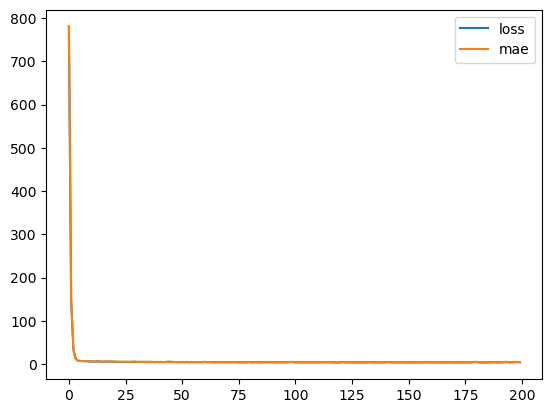

In [519]:
pd.DataFrame(history_6.history).plot()